In [ ]:
##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Mortgage_Default/Mortgage_Default/Data_and_Cleaning/revised_mort_data.csv')

In [3]:
cols_drop = ['Unnamed: 0', 'id', 'default_time', 'payoff_time', 'ratio_paid']

In [4]:
df.drop(columns=cols_drop, inplace=True)

In [5]:
df

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,1
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,1
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,1
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,0
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,1
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,0
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,1


In [7]:
df.isna().sum()

balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
status_time                0
dtype: int64

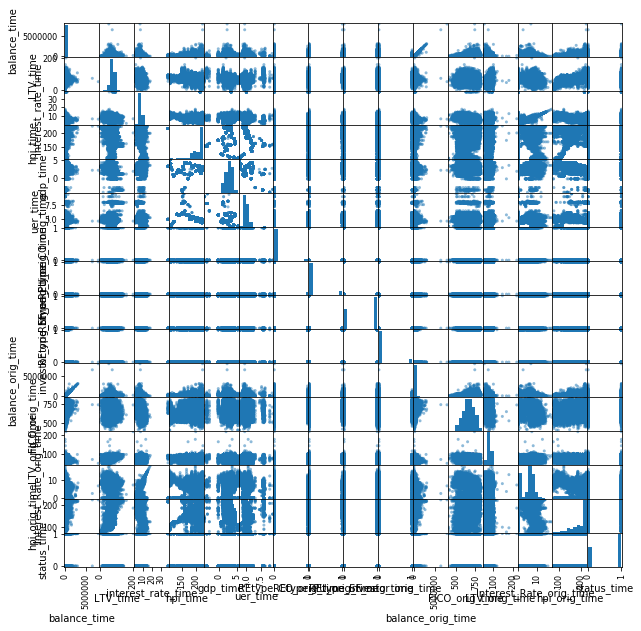

In [8]:
pd.plotting.scatter_matrix(df, figsize=(10,10)); 

In [9]:
df['status_time'].value_counts() 

1    23527
0    14531
Name: status_time, dtype: int64

In [10]:
y = df['status_time']
X = df.drop('status_time', axis=1)
X.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42


In [11]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77


In [12]:
# Perform a train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [13]:
# Calculate the mean and standard deviation for each feature within each class for the training set
train = pd.concat([X_train, y_train], axis=1)
aggs = train.groupby('status_time').agg(['mean', 'std'])
aggs

balance_time                  LTV_time             \
                      mean            std       mean        std   
status_time                                                       
0            253463.174075  194468.220678  79.716173  12.027495   
1            252323.056601  220024.782528  72.470068  13.870886   

            interest_rate_time              hpi_time             gdp_time  \
                          mean       std        mean        std      mean   
status_time                                                                 
0                     7.722144  1.662526  212.564475  19.117841  2.319937   
1                     7.066249  2.022448  201.513413  26.845724  2.917639   

                       ... balance_orig_time                FICO_orig_time  \
                  std  ...              mean            std           mean   
status_time            ...                                                   
0            0.853733  ...     253904.856295  194118.712975     650.943251   
1            0.896857  ...     254924.590494  222875.363304     668.183125   

                       LTV_orig_time            Interest_Rate_orig_time  \
                   std          mean        std                    mean   
status_time                                                               
0            66.553623     80.994919   8.515652                5.785092   
1            74.280228     79.059182  10.429457                5.061154   

                      hpi_orig_time             
                  std          mean        std  
status_time                                     
0            3.393038    209.871163  27.361915  
1            3.399308    186.842536  35.157379  

[2 rows x 30 columns]

In [14]:
from scipy import stats
def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # Observation
    obs = obs_row[feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y
p_x_given_class(X_train.iloc[0], X.columns[0], 0)

1.1554362633236353e-06

In [15]:
import numpy as np
def predict_class(obs_row):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [16]:
predict_class(X_train.iloc[0])

1

In [17]:
y_hat_train = [predict_class(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test = [predict_class(X_test.iloc[idx]) for idx in range(len(X_test))]

In [18]:
residuals_train = y_hat_train == y_train
acc_train = residuals_train.sum()/len(residuals_train)

residuals_test = y_hat_test == y_test
acc_test = residuals_test.sum()/len(residuals_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(acc_train, acc_test))

Training Accuracy: 0.6928143502785271	Testing Accuracy: 0.6962690488702049


In [19]:
def p_band_x_given_class(obs_row, feature, c, range_width_std):
    """obs_row is the observation in question 
    feature is the feature of the observation row for which you are calculating a conditional probability
    c is the class flag for the conditional probability
    range_width_std is the range in standard deviations of the feature variable to calculate the integral under the PDF curve for"""
    
    mu = aggs[feature]['mean'][c]
    std = aggs[feature]['std'][c]
    
    # observation
    obs = obs_row[feature] 
    interval_min = obs - range_width_std*std/2
    interval_max = obs + range_width_std*std/2
    
    cdf_min = stats.norm.cdf(interval_min, loc=mu, scale=std)
    cdf_max = stats.norm.cdf(interval_max, loc=mu, scale=std)
    p_x_given_y = cdf_max - cdf_min
    return p_x_given_y

In [20]:
# Update the prediction function
def predict_class(obs_row, how='bands', range_width_std=.25):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            if how == 'bands':
                p *= p_band_x_given_class(obs_row, feature, c, range_width_std=range_width_std)
            else:
                p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [21]:
num_folds = 10
subset_size = len(y_train)/num_folds
for i in range(num_folds):
    testing_this_round = y_train[i*subset_size:][:subset_size]
    training_this_round = y_train[:i*subset_size] + y_train[(i+1)*subset_size:]
    # train using training_this_round
    # evaluate against testing_this_round
    # save accuracy

# find mean accuracy over all rounds

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [0.0] of <class 'float'>

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
train_accs = []
test_accs = []
range_stds = np.linspace(0.1, 2, num=21)
for range_std in range_stds:    
    y_hat_train = [predict_class(X_train.iloc[idx], range_width_std=range_std) for idx in range(len(X_train))]
    y_hat_test = [predict_class(X_test.iloc[idx], range_width_std=range_std) for idx in range(len(X_test))]
    
    residuals_train = y_hat_train == y_train
    acc_train = residuals_train.sum()/len(residuals_train)

    residuals_test = y_hat_test == y_test
    acc_test = residuals_test.sum()/len(residuals_test)
    
    train_accs.append(acc_train)
    test_accs.append(acc_test)
plt.plot(range_stds, train_accs, label='Train Accuracy')
plt.plot(range_stds, test_accs, label='Test Accuracy')
plt.title('Train and Test Accruaccy Versus Various Standard Deviation Bin Ranges for GNB')
plt.ylabel('Classifier Accuracy')
plt.xlabel('Standard Deviations Used for Integral Band Width')
plt.legend(loc=(1.01,.85))

KeyboardInterrupt: 

In [23]:
temp = df[df['status_time'] == 1]['LTV_time']
aggs = temp.agg(['mean', 'std'])
aggs

mean    72.55029
std     13.97689
Name: LTV_time, dtype: float64

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import scipy.stats as stats
sns.set_style('white')

Probability of ###### withing Range for the Given Class: 8.541298257558338e-08


Text(0.5, 0, '#####')

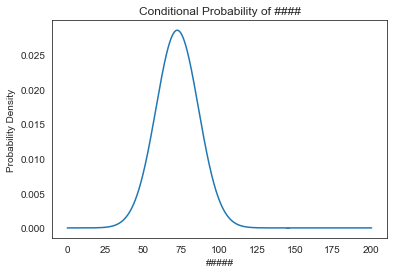

In [25]:
x = np.linspace(temp.min(), temp.max(), num=10**3)
pdf = stats.norm.pdf(x, loc=aggs['mean'], scale=aggs['std'])
xi = 145
width = 2
xi_lower = xi - width/2
xi_upper = xi + width/2

fig, ax = plt.subplots()

plt.plot(x, pdf)

# Make the shaded region
ix = np.linspace(xi_lower, xi_upper)
iy = stats.norm.pdf(ix, loc=aggs['mean'], scale=aggs['std'])
verts = [(xi_lower, 0), *zip(ix, iy), (xi_upper, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly);

plt.plot((145, 145), (0, stats.norm.pdf(145, loc=aggs['mean'], scale=aggs['std'])), linestyle='dotted')
p_area = stats.norm.cdf(xi_upper, loc=aggs['mean'], scale=aggs['std']) - stats.norm.cdf(xi_lower, loc=aggs['mean'], scale=aggs['std'])
print('Probability of ###### withing Range for the Given Class: {}'.format(p_area))
plt.title('Conditional Probability of ####')
plt.ylabel('Probability Density')
plt.xlabel('#####')

[[1997  994]
 [1591 4933]]


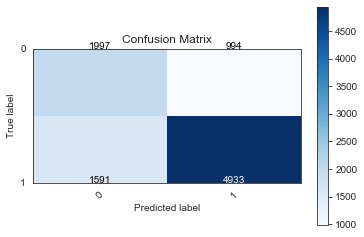

In [34]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix



cnf_matrix = confusion_matrix(y_hat_test, y_test)

print(cnf_matrix)

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

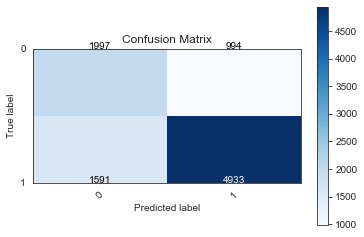

In [35]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [36]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.66766968 0.33233032]
 [0.24386879 0.75613121]]


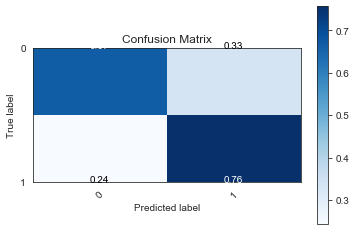

In [38]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [44]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(y_hat_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(y_hat_train)
dummy_clf.score(y_hat_train, y_train)

0.6166135304628105

In [47]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(y_hat_test, y_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(y_test)
dummy_clf.score(y_hat_test, y_test)

0.6229111928533894

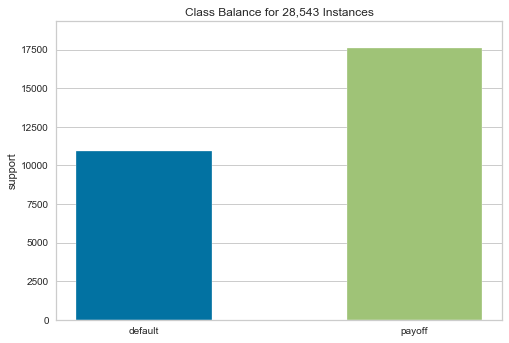

In [48]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
# X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["default", "payoff"])

visualizer.fit(y_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [49]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 19029 points : 6444


In [ ]:
confusion matrix

In [ ]:
cross validate

In [ ]:
check balance

In [ ]:
gridsearch?